In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

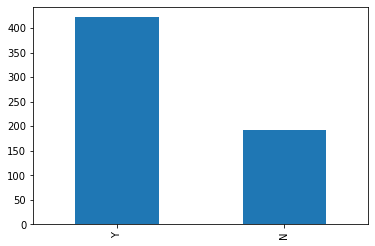

In [8]:
train['Loan_Status'].value_counts().plot.bar()

approval rate is 69%

# catagorical variable analysis

In [9]:
# gender, married, Self_Employed, Credit_History

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [12]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

<AxesSubplot:title={'center':'credit hist'}>

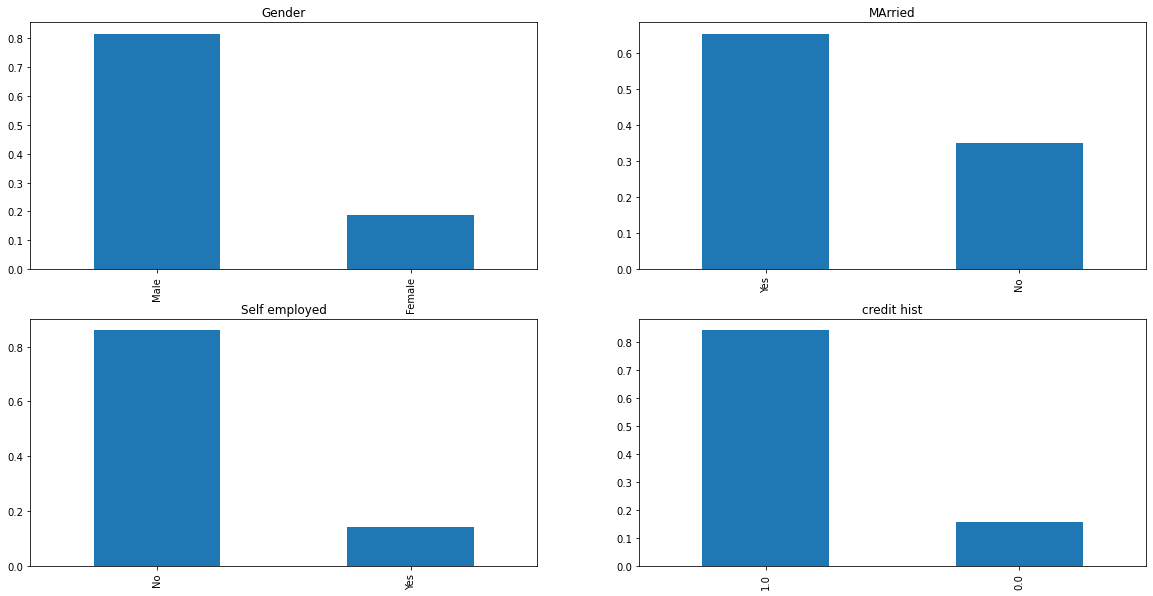

In [14]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='MArried')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='credit hist')

# Ordinal Variable analysis

In [15]:
#dpendents,education, property area

<AxesSubplot:title={'center':'property area'}>

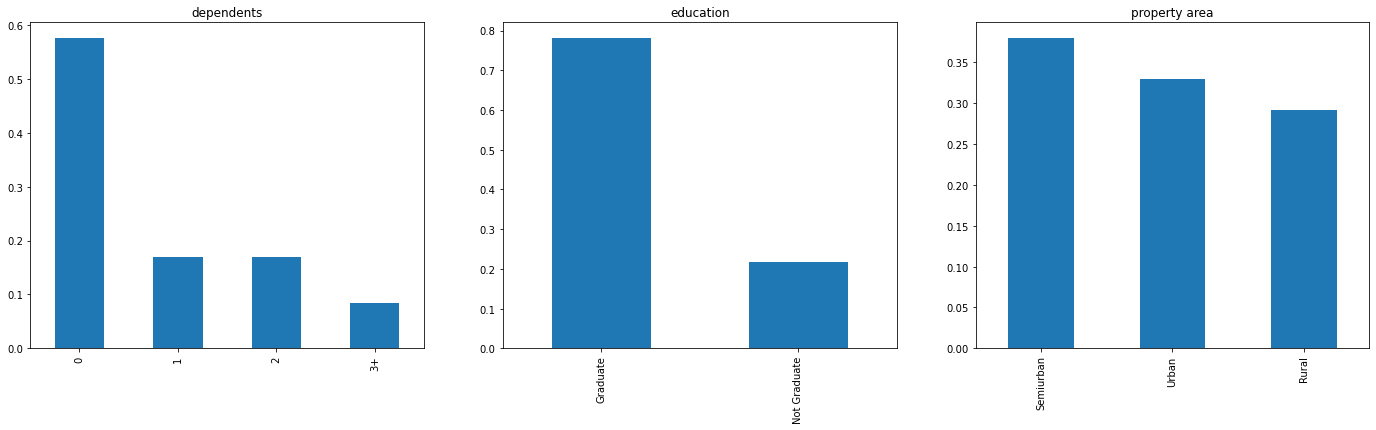

In [16]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='property area')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

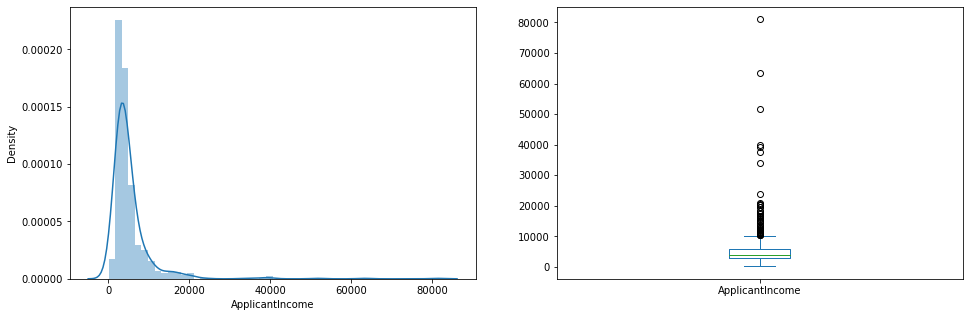

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

In [18]:
#not normally didtributed, has lot of outliers

Text(0.5, 0.98, '')

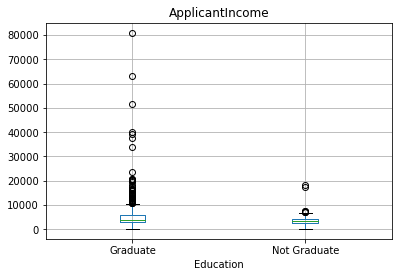

In [19]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


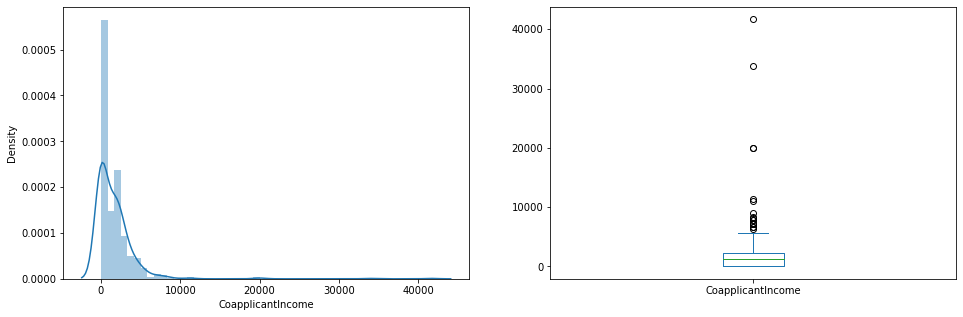

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

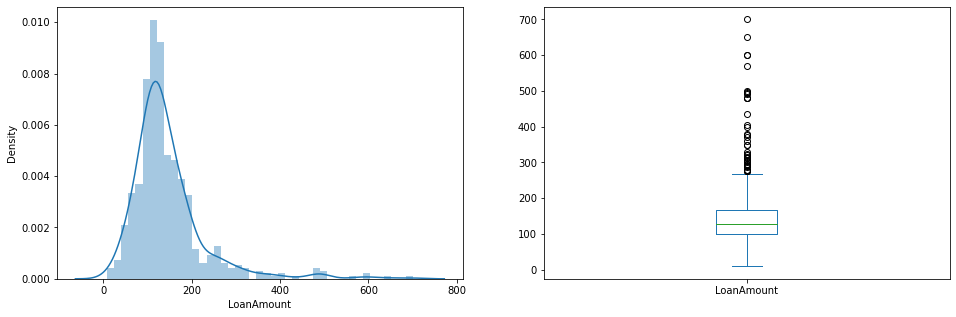

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

# bivariate analysis

## catagorical vs target variable

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])

<AxesSubplot:xlabel='Gender'>

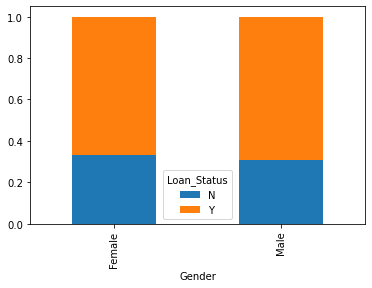

In [23]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

In [24]:
#proportionof male and female for both approved and not approved

<AxesSubplot:xlabel='Self_Employed'>

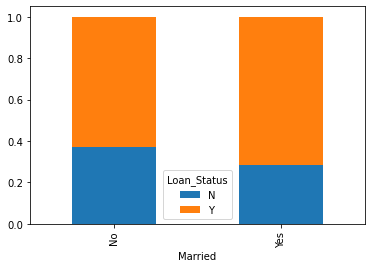

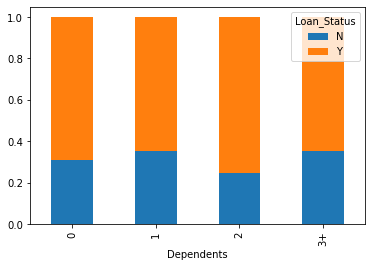

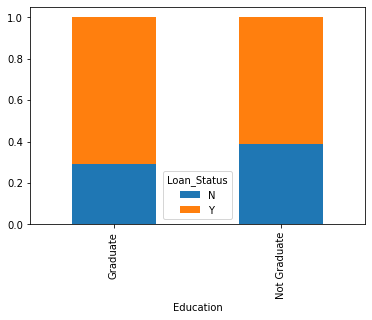

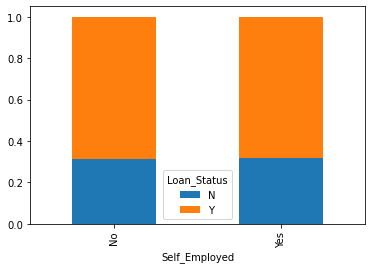

In [25]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
education=pd.crosstab(train['Education'],train['Loan_Status'])
selfemployed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
selfemployed.div(selfemployed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [26]:
married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<AxesSubplot:xlabel='Credit_History'>

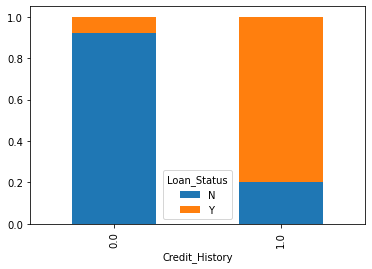

In [27]:
credithistory=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credithistory.div(credithistory.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='Property_Area'>

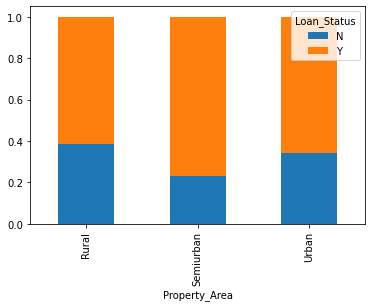

In [28]:
propertyarea=pd.crosstab(train['Property_Area'],train['Loan_Status'])
propertyarea.div(propertyarea.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

# Numerical vs Target variable

<AxesSubplot:xlabel='Loan_Status'>

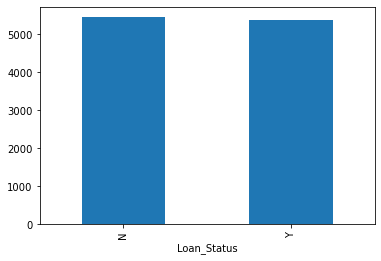

In [29]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

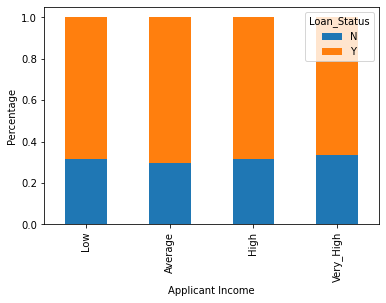

In [30]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very_High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'percentage')

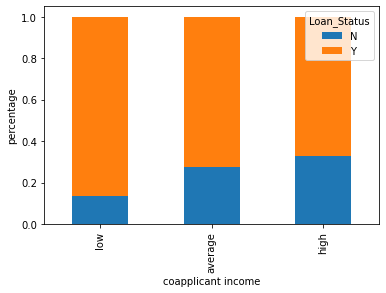

In [31]:
bins=[0,1000,3000,42000]
group=['low','average','high']
train['coapplicant_income']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
coapplicant_income_bin=pd.crosstab(train['coapplicant_income'],train['Loan_Status'])
coapplicant_income_bin.div(coapplicant_income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked='True')
plt.xlabel('coapplicant income')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

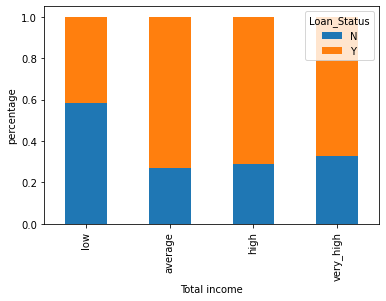

In [32]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very_high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total income')
plt.ylabel('percentage')

<AxesSubplot:xlabel='loan_amount_bin'>

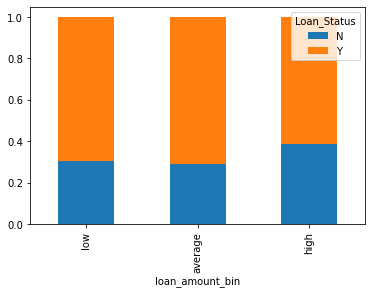

In [33]:
bin=[0,100,200,700]
groups=['low','average','high']
train['loan_amount_bin']=pd.cut(train['LoanAmount'],bin,labels=groups)
loancmount_bin=pd.crosstab(train['loan_amount_bin'],train['Loan_Status'])
loancmount_bin.div(loancmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:>

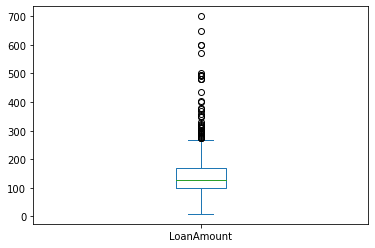

In [34]:
train['LoanAmount'].plot.box()

<AxesSubplot:>

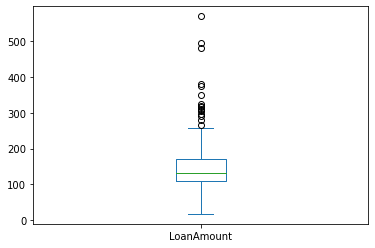

In [35]:
df=train.dropna()
df['LoanAmount'].plot.box()

In [36]:
train=train.drop(['Income_bin','coapplicant_income', 'Total_Income_bin','loan_amount_bin'],axis=1)

In [37]:
train['Dependents'].replace('3+',3, inplace=True)
train['Dependents'].unique()
test['Dependents'].replace('3+',3, inplace=True)

In [38]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [39]:
train['Loan_Status'].replace('Y', 1, inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)

<AxesSubplot:>

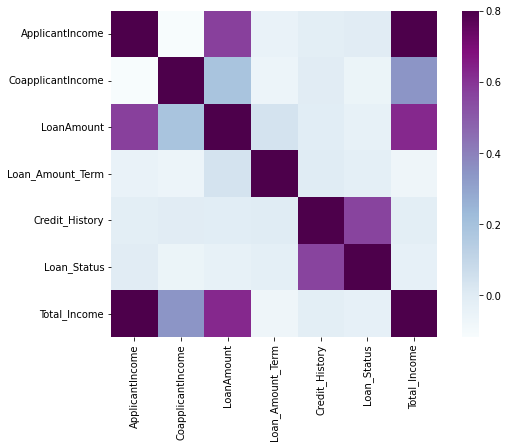

In [40]:
matrix=train.corr()
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8, square=True, cmap='BuPu')

In [41]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [42]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

In [43]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [44]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [45]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [46]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [48]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [49]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [50]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [51]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [52]:
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [53]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

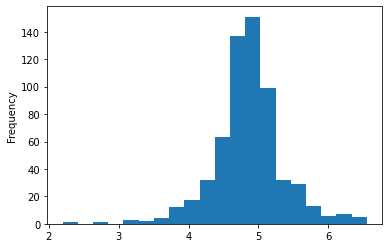

In [54]:
train['loan_amount_log']=np.log(train['LoanAmount'])
train['loan_amount_log'].plot.hist(bins=20)
test['loan_amount_log']=np.log(test['LoanAmount'])

<AxesSubplot:>

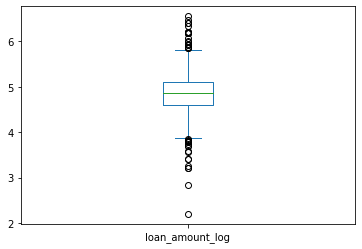

In [55]:
train['loan_amount_log'].plot(kind='box')

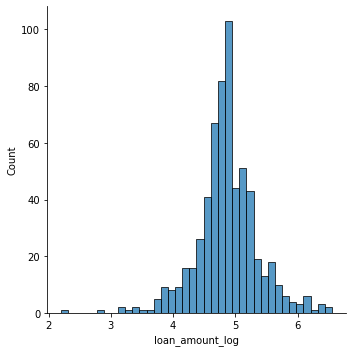

In [56]:
sns.displot(train['loan_amount_log'])

# Feature Engg

In [57]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

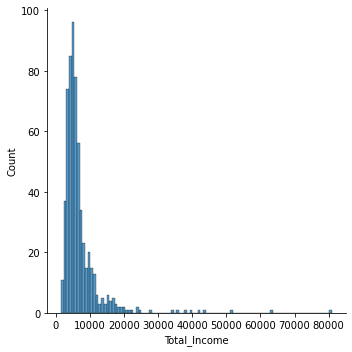

In [58]:
sns.displot(train['Total_Income'])

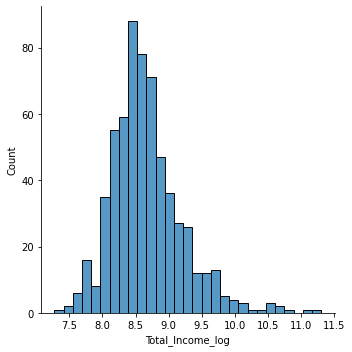

(614,)

In [59]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.displot(train['Total_Income_log']);
plt.show()
train['Total_Income_log'].shape

In [60]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

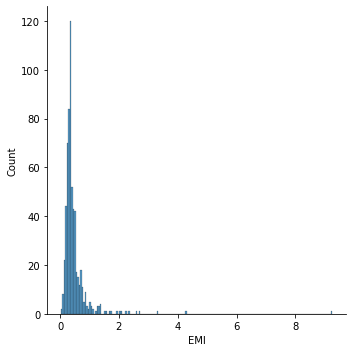

In [61]:
sns.displot(train['EMI'])

In [62]:
train['Balance_income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_income']=test['Total_Income']-(test['EMI']*1000)

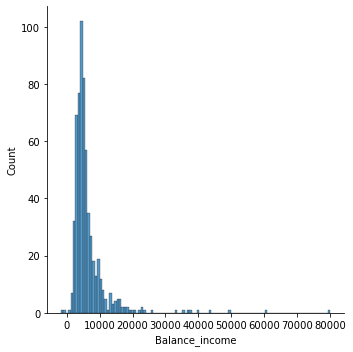

In [63]:
sns.displot(train['Balance_income']);

In [64]:
#train['Balance_income_log']=np.log(train['Balance_income'])
#test['Balance_income_log']=np.log(test['Balance_income'])
#sns.displot(train['Balance_income_log'])
#train['Balance_income_log'].shape

In [65]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],axis=1)

# Model building

In [66]:
train=train.drop('Loan_ID', axis=1)

In [67]:
test=test.drop('Loan_ID',axis=1)

In [68]:
x=train.drop('Loan_Status',1)
y=train.Loan_Status

C:\Users\User\AppData\Local\Temp/ipykernel_9324/3818894524.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=train.drop('Loan_Status',1)


In [69]:
x=pd.get_dummies(x)

In [70]:
x.columns

Index(['Credit_History', 'loan_amount_log', 'Total_Income_log', 'EMI',
       'Balance_income', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_3', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [71]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [72]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [73]:
i=1
kf=StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
accuracy_list=[]
for train_index,test_index in kf.split(x,y):
    print('\n{} of k fold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index], x.loc[test_index]
    ytr,yvl=y[train_index], y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    accuracy_list.append(score)
    print('accuracy score=',score)
    i+=1


1 of k fold 5
accuracy score= 0.6991869918699187

2 of k fold 5
accuracy score= 0.6422764227642277

3 of k fold 5
accuracy score= 0.7479674796747967

4 of k fold 5
accuracy score= 0.7479674796747967

5 of k fold 5
accuracy score= 0.7131147540983607
